# Movies Rating Analysis

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv(r'C:\Users\akash\OneDrive\Desktop\FSDS\SEABORN\Movie-Rating.csv')
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [3]:
len(movies)

559

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [6]:
type(movies)

pandas.core.frame.DataFrame

In [7]:
movies.shape

(559, 6)

In [8]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [9]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
# Removed spaces & % removed noise characters

In [10]:
movies.head() 

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [12]:
movies.describe()

# descriptive statistics gives only on Numeric data
# Year attributes is a Numeric column therefore .describe() gives descriptive stats on Year
# we have to change its dataType to category with the help of .astype() methode

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [13]:
movies['Year'] = movies.Year.astype('category')

In [14]:
# and we do also in Genre and Film attributes
movies.Film = movies.Film.astype('category')
movies['Genre'] = movies['Genre'].astype('category')

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [16]:
movies['Genre'].cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [17]:
movies.to_csv('MoviesRating.csv')

In [18]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


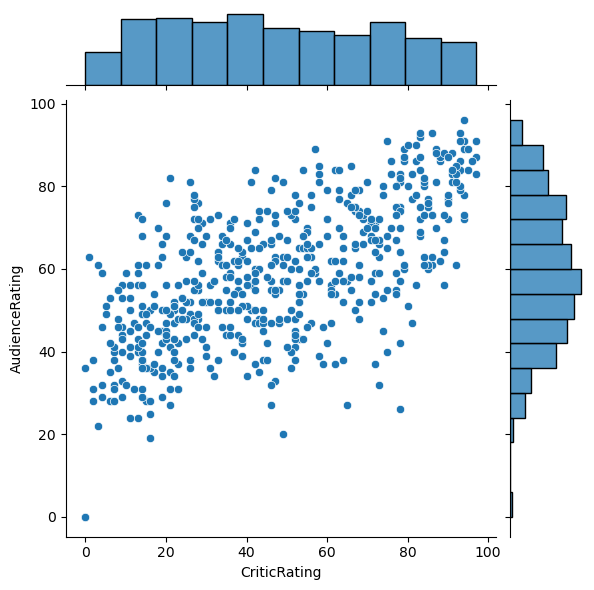

In [19]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating')

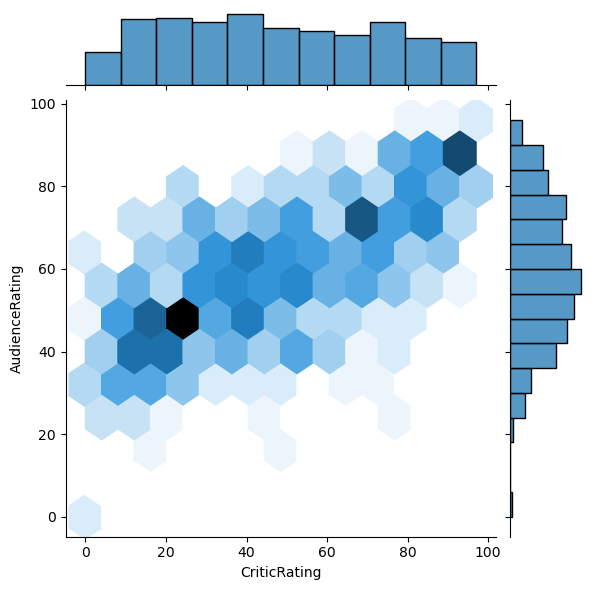

In [20]:
j2 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

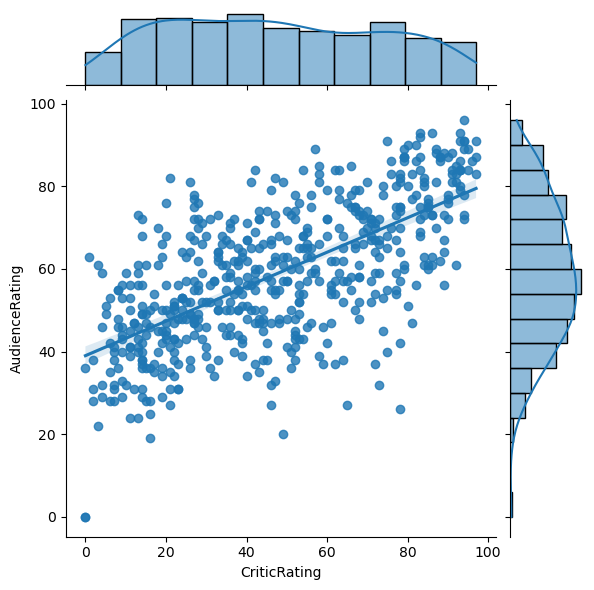

In [21]:
j3 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'reg')

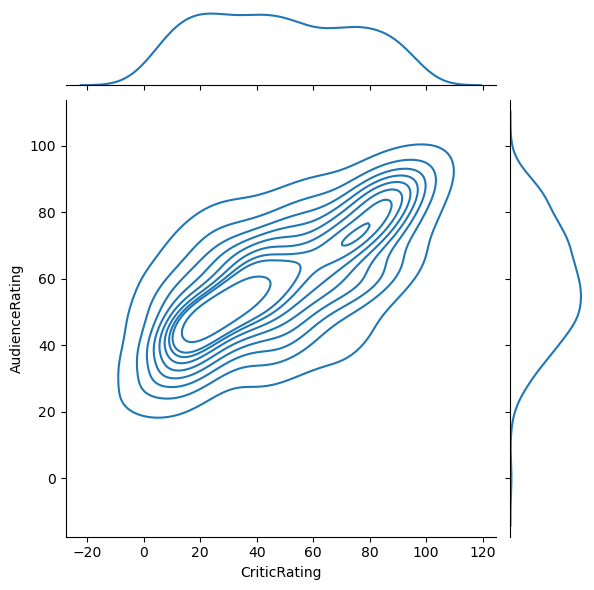

In [22]:
j4 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'kde')

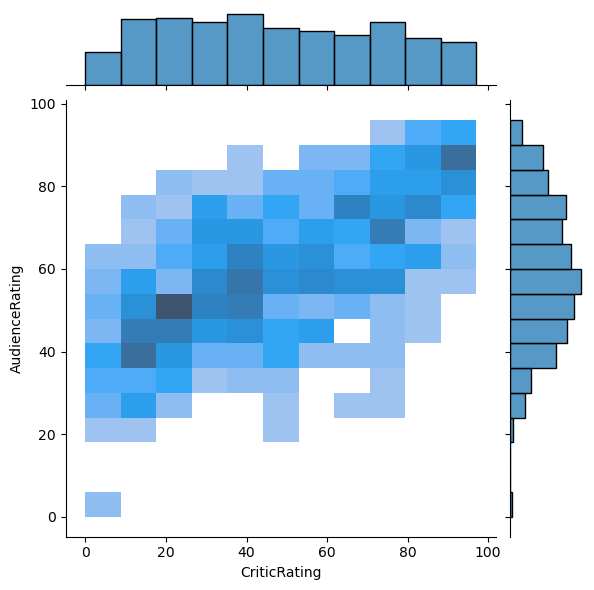

In [23]:
j5 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hist')

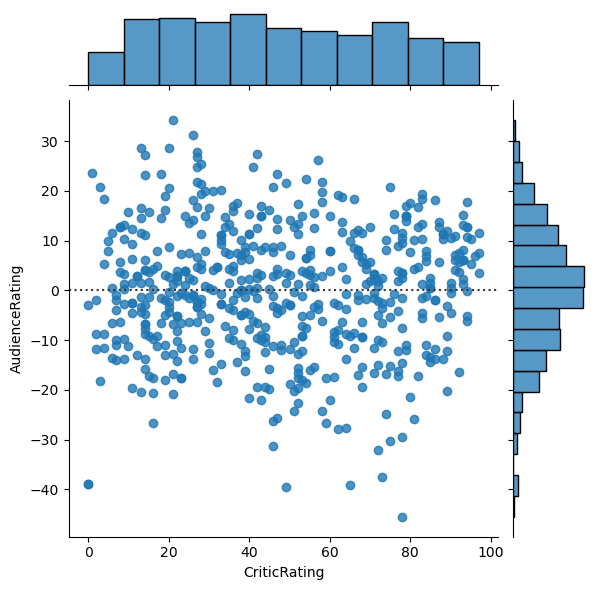

In [24]:
j6 = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'resid')

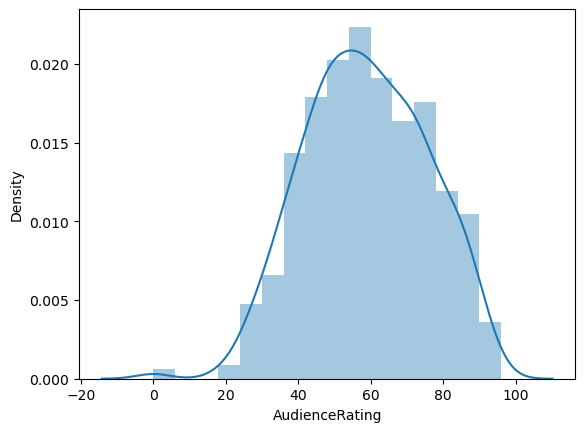

In [25]:
m1 = sns.distplot(movies['AudienceRating'])

In [26]:
sns.set_style('darkgrid')

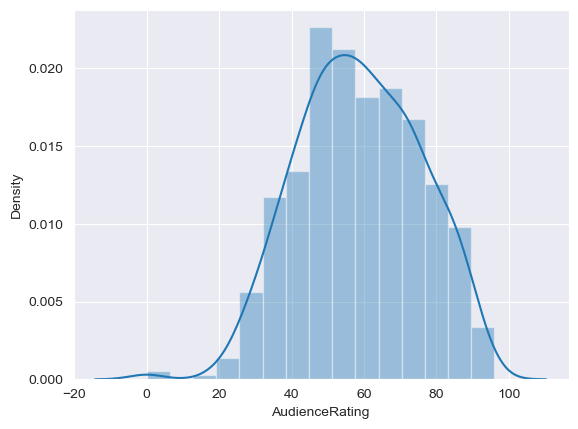

In [27]:
m2 = sns.distplot(movies.AudienceRating, bins = 15)

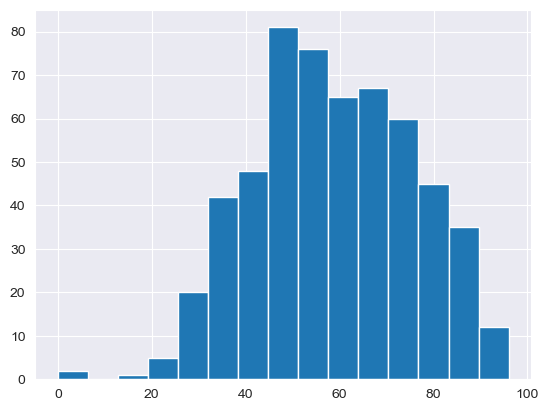

In [28]:
n1 = plt.hist(movies.AudienceRating, bins = 15)

In [29]:
sns.set_style('white')

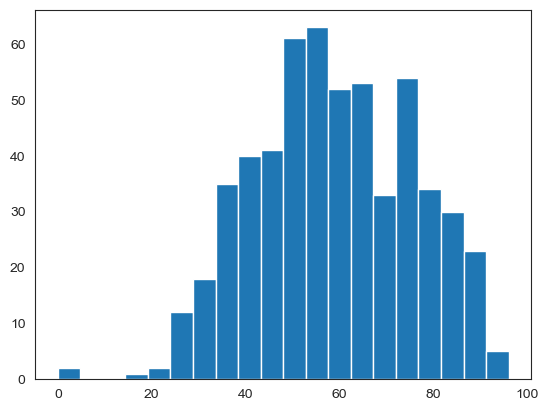

In [30]:
n2 = plt.hist(movies['AudienceRating'], bins = 20)

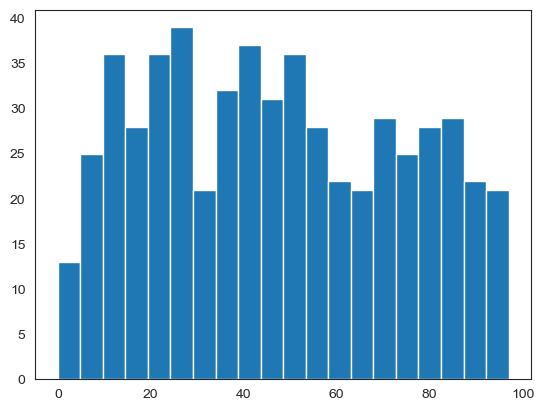

In [31]:
n3 = plt.hist(movies['CriticRating'], bins = 20)

<Axes: xlabel='BudgetMillions', ylabel='Count'>

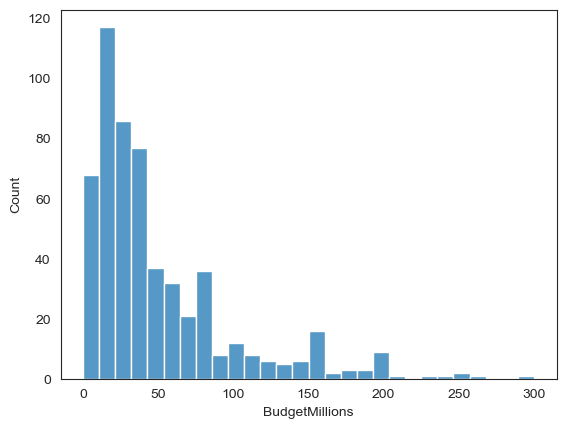

In [32]:
sns.histplot(movies.BudgetMillions)

(array([237., 162.,  75.,  28.,  17.,  20.,  13.,   3.,   3.,   1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

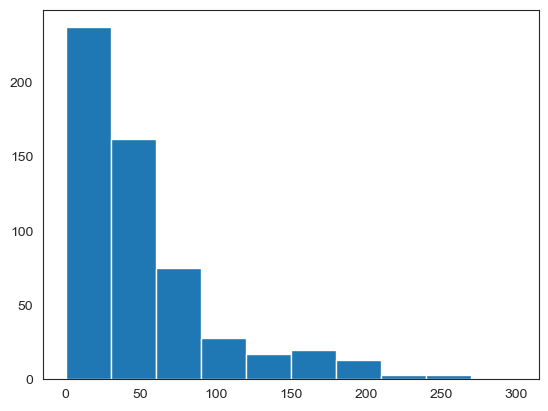

In [33]:
plt.hist(movies['BudgetMillions'])

<Axes: xlabel='BudgetMillions', ylabel='Count'>

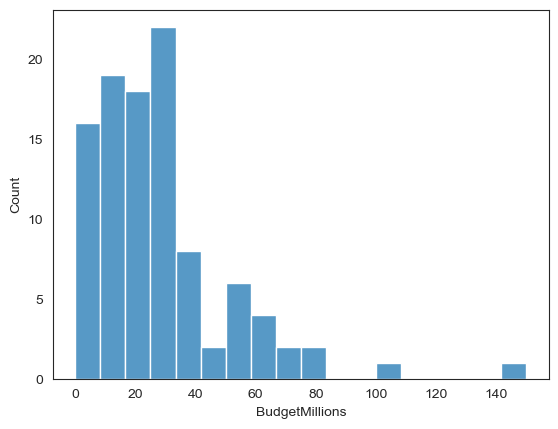

In [34]:
sns.histplot(movies[movies['Genre'] == 'Drama'].BudgetMillions)

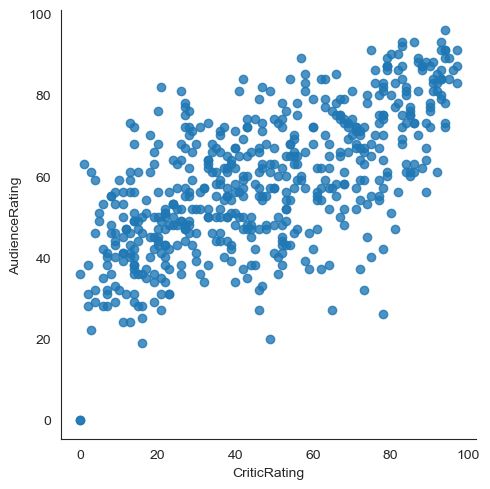

In [35]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',
                 fit_reg=False)

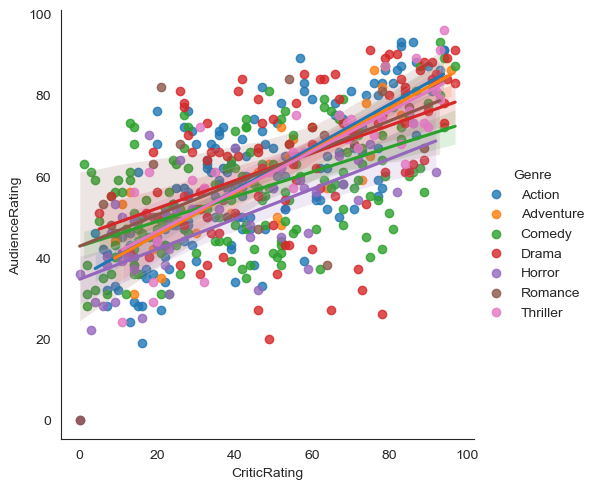

In [36]:
vis2 = sns.lmplot(data = movies, x = 'CriticRating', y = 'AudienceRating', 
                 hue = 'Genre', fit_reg = True)

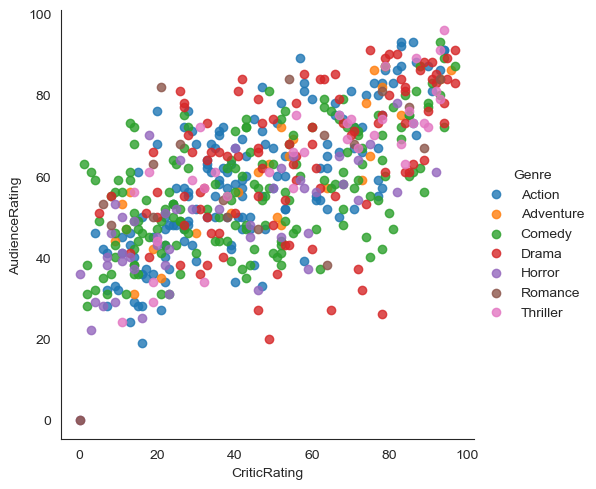

In [37]:
vis3 = sns.lmplot(data = movies, x = 'CriticRating', y = 'AudienceRating',
                  hue = 'Genre', fit_reg = False)

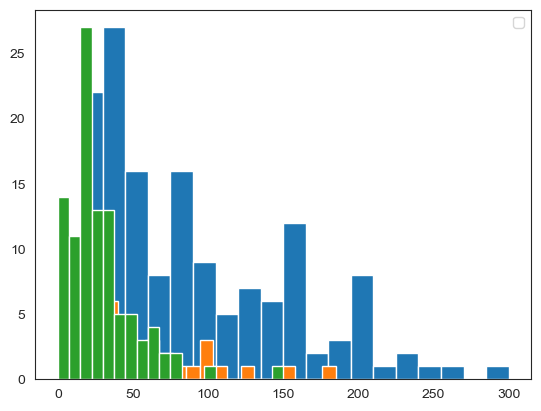

In [38]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 20)
plt.hist(movies[movies['Genre'] == 'Thriller'].BudgetMillions, bins = 20)
plt.hist(movies[movies['Genre'] == 'Drama'].BudgetMillions, bins = 20)
plt.legend()
plt.show()

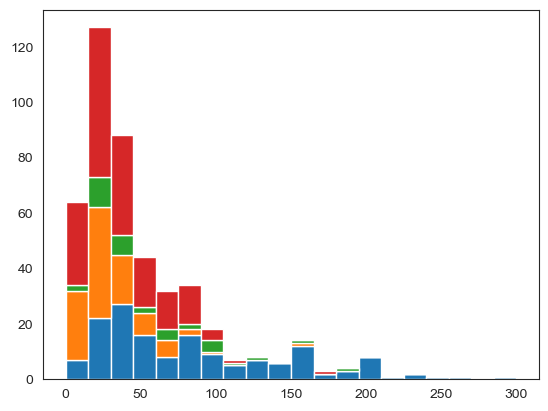

In [39]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
         movies[movies.Genre == 'Drama'].BudgetMillions,\
         movies[movies.Genre == 'Thriller'].BudgetMillions,\
         movies[movies.Genre == 'Comedy'].BudgetMillions], 
        bins = 20, stacked=True)
plt.show()

In [40]:
for gen in movies['Genre'].cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


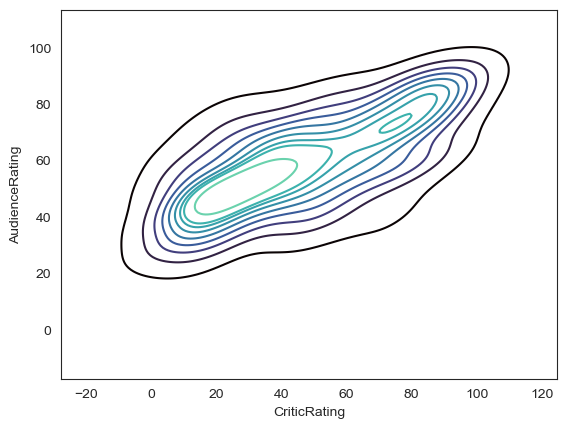

In [41]:
k1 = sns.kdeplot(
    x=movies.CriticRating,
    y=movies.AudienceRating,
    cmap='mako'
)

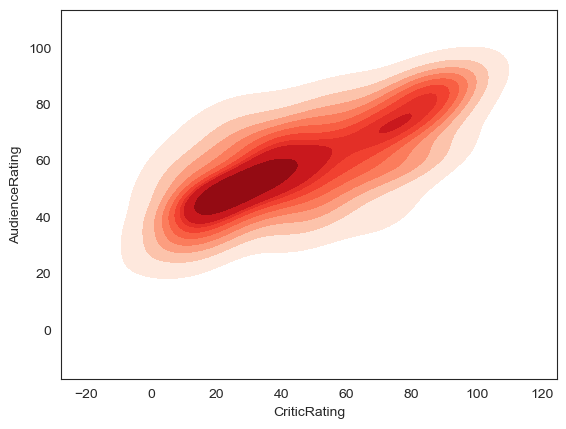

In [42]:
k2 = sns.kdeplot(
    x = movies['CriticRating'],
    y = movies['AudienceRating'],
    shade = True, shade_lowest = False,
    cmap = 'Reds'
)

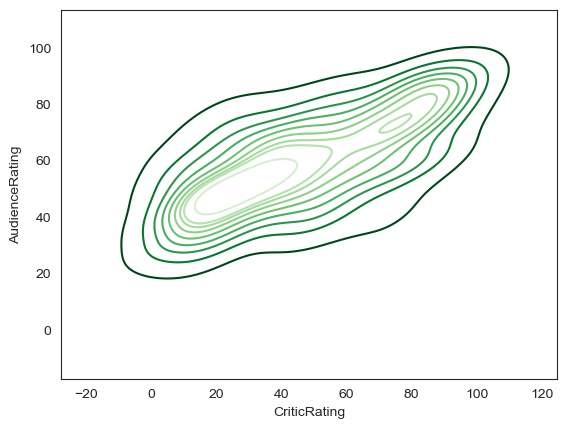

In [43]:
k3 = sns.kdeplot(
    x = movies['CriticRating'],
    y = movies['AudienceRating'],
    cmap = 'Greens_r',
    shade_lowest = False
    
)

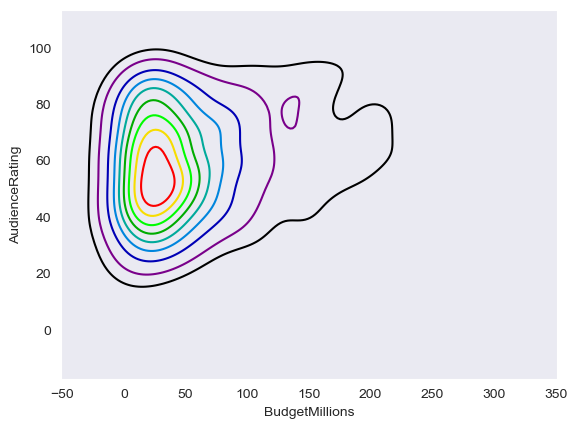

In [44]:
sns.set_style('dark')
k3 = sns.kdeplot(
    x = movies['BudgetMillions'],
    y = movies['AudienceRating'],
    cmap = 'nipy_spectral',
    shade_lowest = False
)

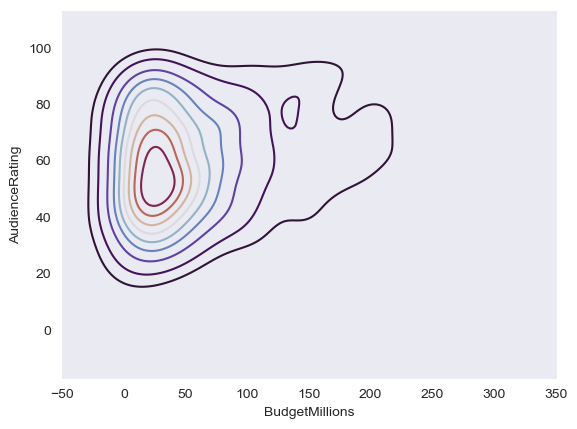

In [45]:
k4 = sns.kdeplot(
    x = movies.BudgetMillions,
    y = movies.AudienceRating,
    cmap = 'twilight_shifted'
)

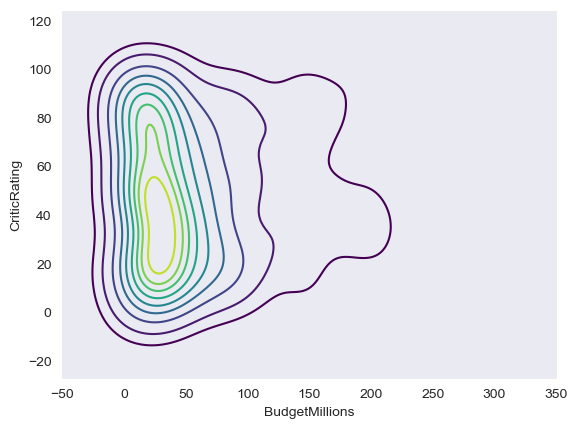

In [46]:
k5 = sns.kdeplot(
    x = movies['BudgetMillions'],
    y = movies['CriticRating'],
    cmap = 'viridis'
)

### `Subplots`

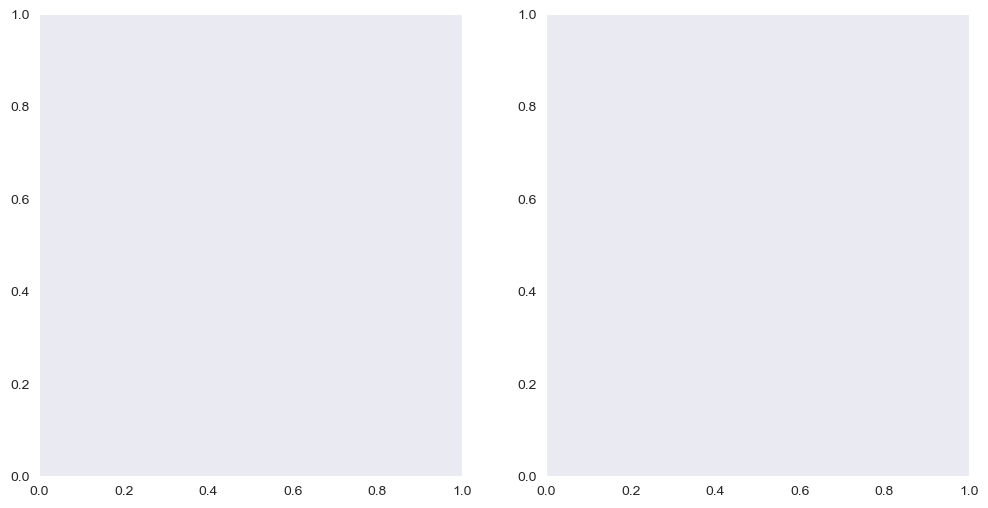

In [49]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))

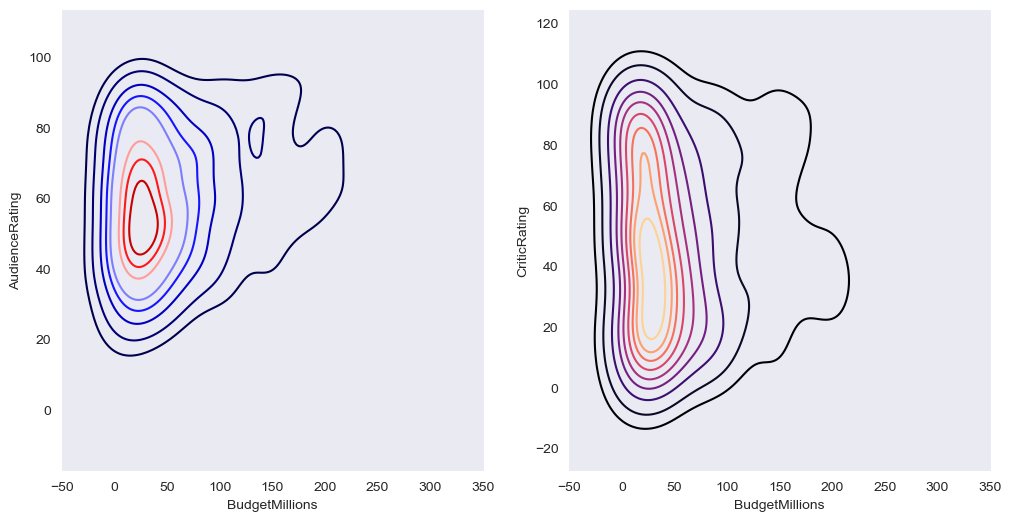

In [53]:
f, axes = plt.subplots(1, 2, figsize = (12, 6))

k1 = sns.kdeplot(
    x =movies['BudgetMillions'],
    y = movies['AudienceRating'],
    ax = axes[0], cmap = 'seismic'
)

k2 = sns.kdeplot(
    x = movies.BudgetMillions,
    y = movies.CriticRating, ax = axes[1],
    cmap = 'magma'
)

In [54]:
axes

array([<Axes: xlabel='BudgetMillions', ylabel='AudienceRating'>,
       <Axes: xlabel='BudgetMillions', ylabel='CriticRating'>],
      dtype=object)

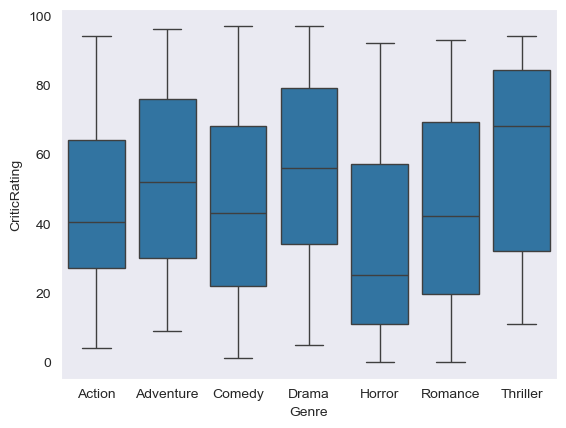

In [58]:
# boxplot

w = sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating')

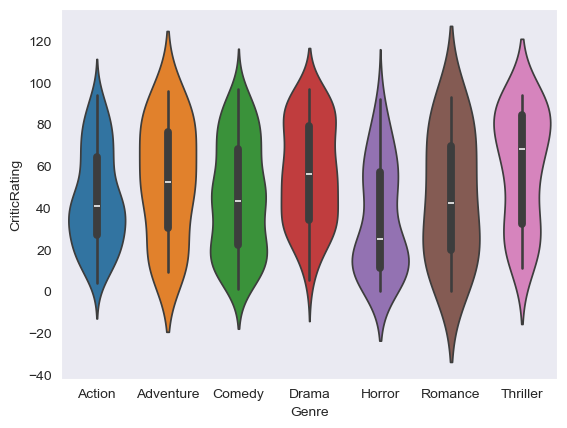

In [78]:
z = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating',
                   palette="tab10")

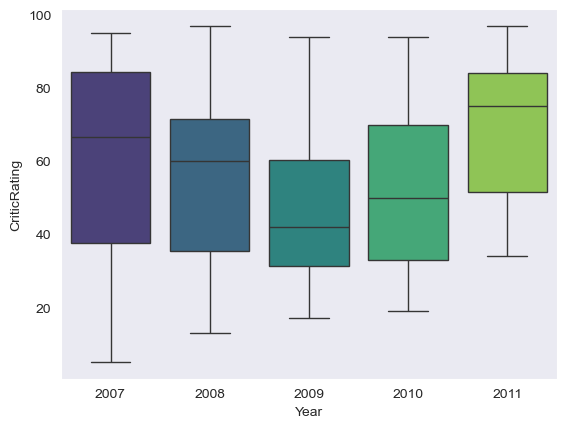

In [81]:
w1 = sns.boxplot(
    data = movies[movies.Genre == 'Drama'],
    x = 'Year', y = 'CriticRating',
    palette="viridis"
)

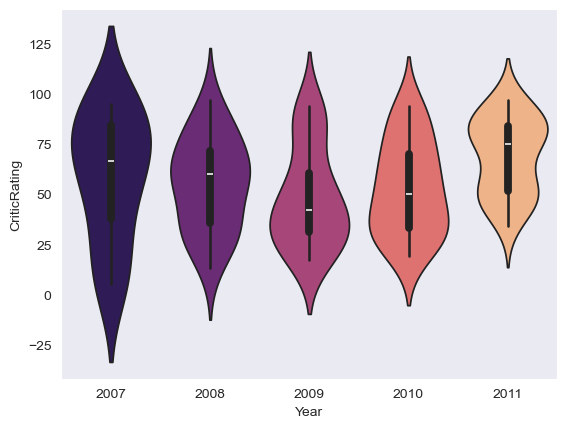

In [82]:
z1 = sns.violinplot(
    data = movies[movies['Genre'] == 'Drama'],
    x = 'Year', y = 'CriticRating', palette = 'magma' 
)

## `Creating  a Facet Grid`

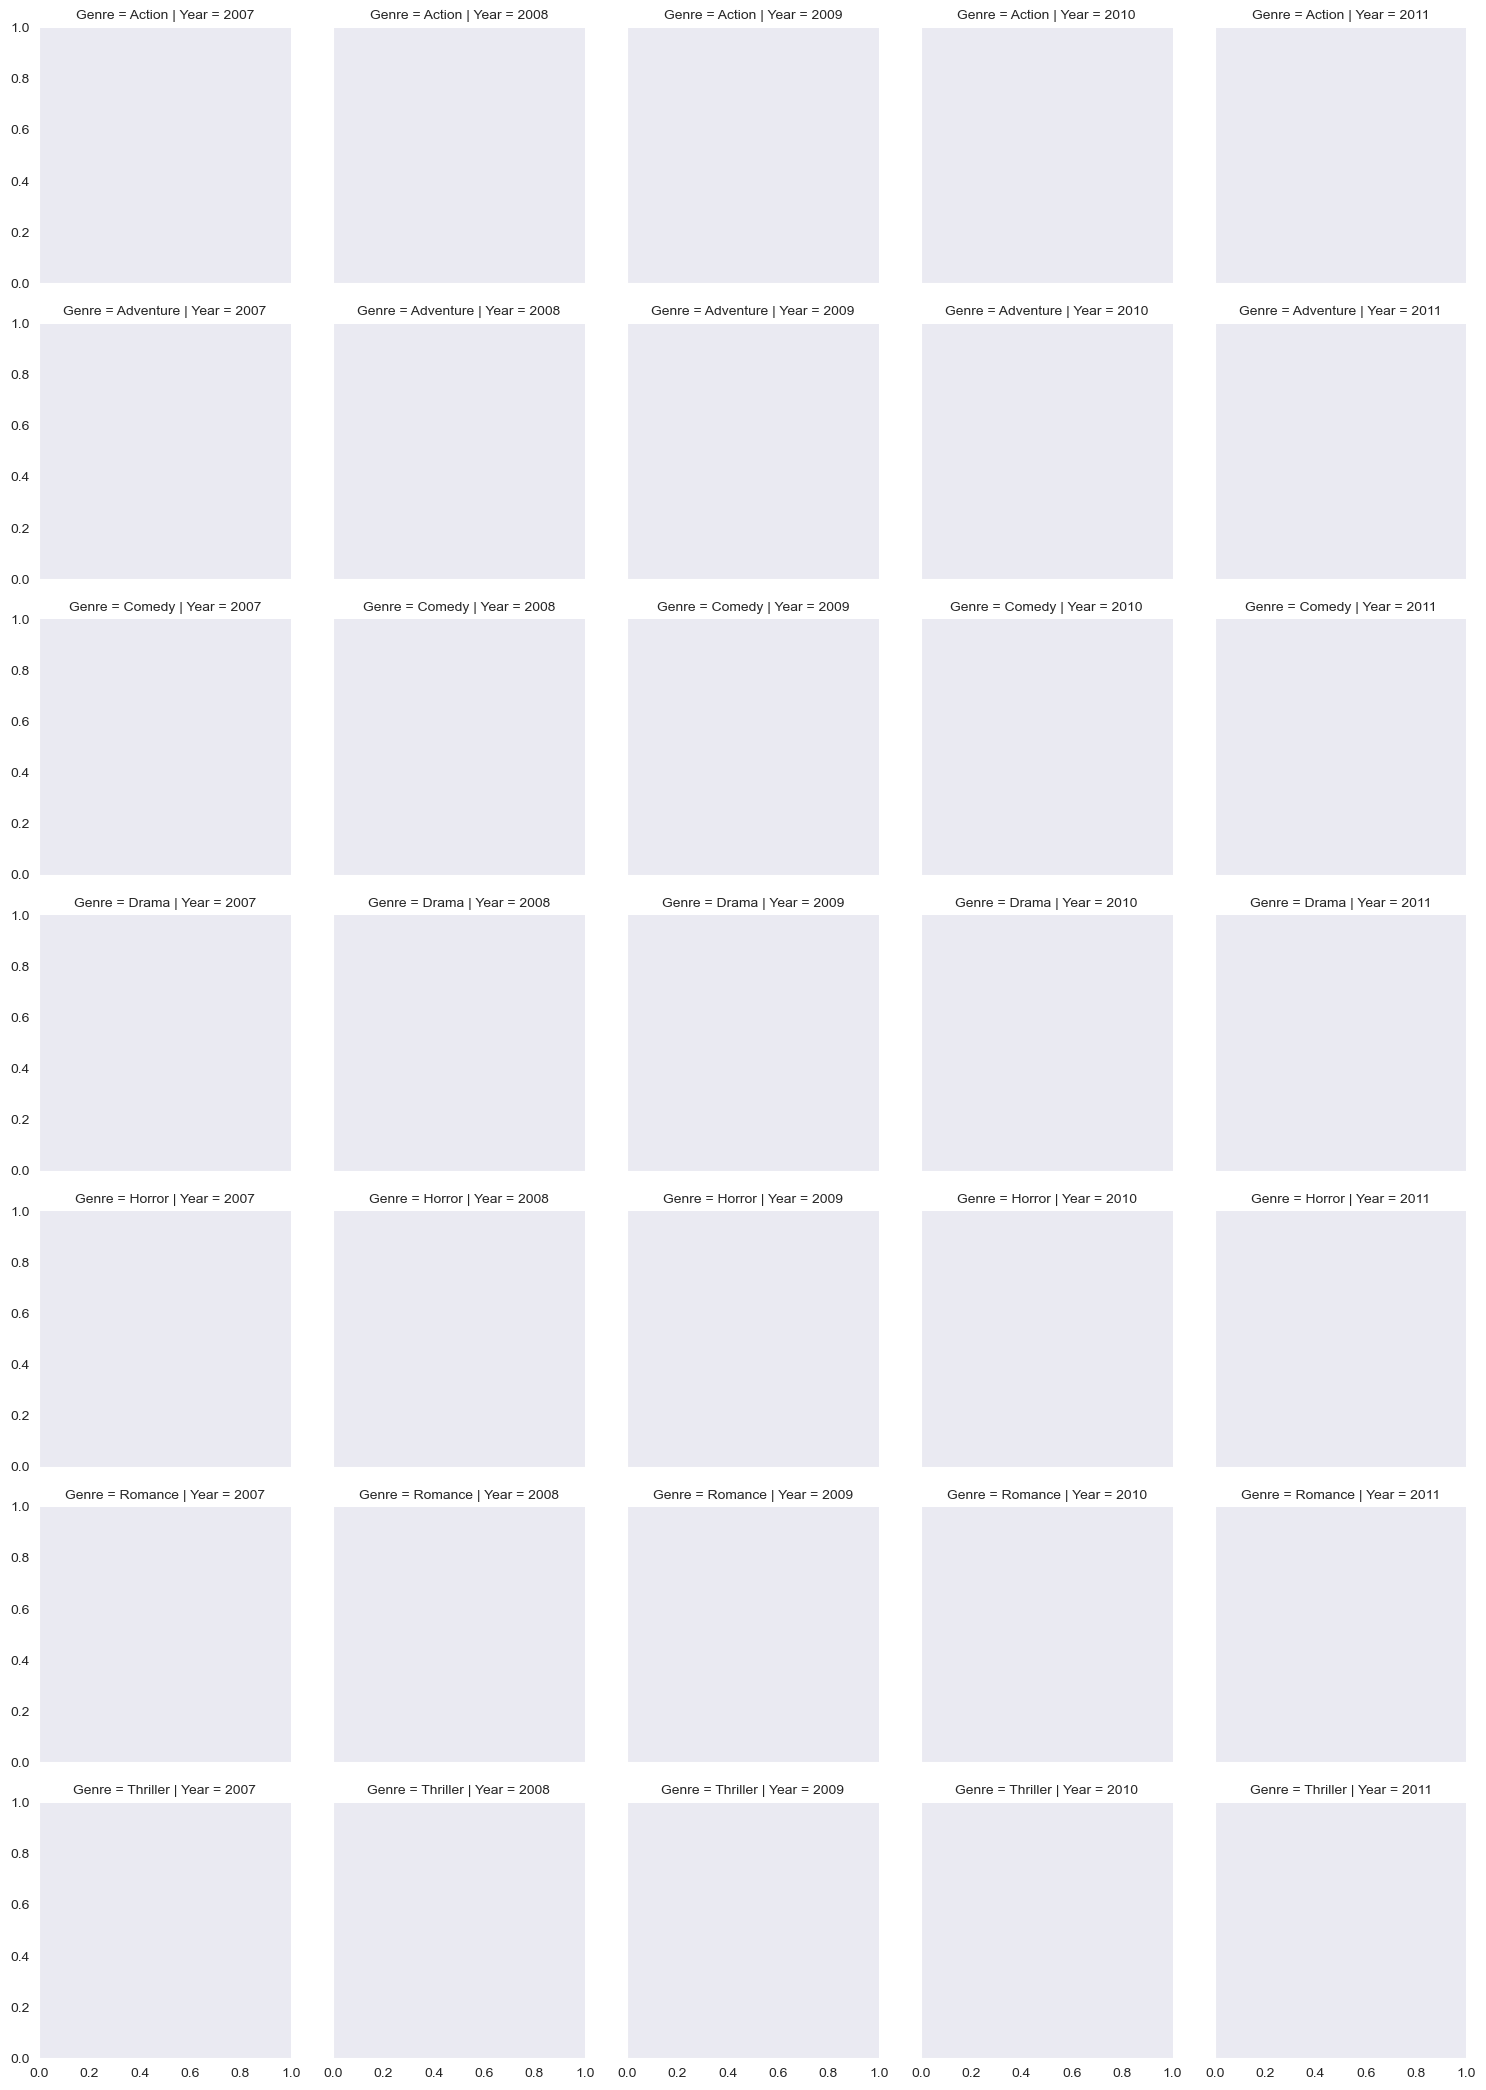

In [84]:
facet = sns.FacetGrid(data=movies, row = 'Genre', 
                      col = 'Year', hue = "Genre")

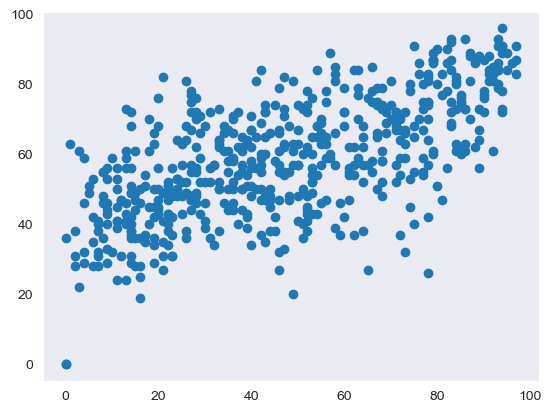

In [85]:
plt.scatter(movies.CriticRating, movies.AudienceRating)

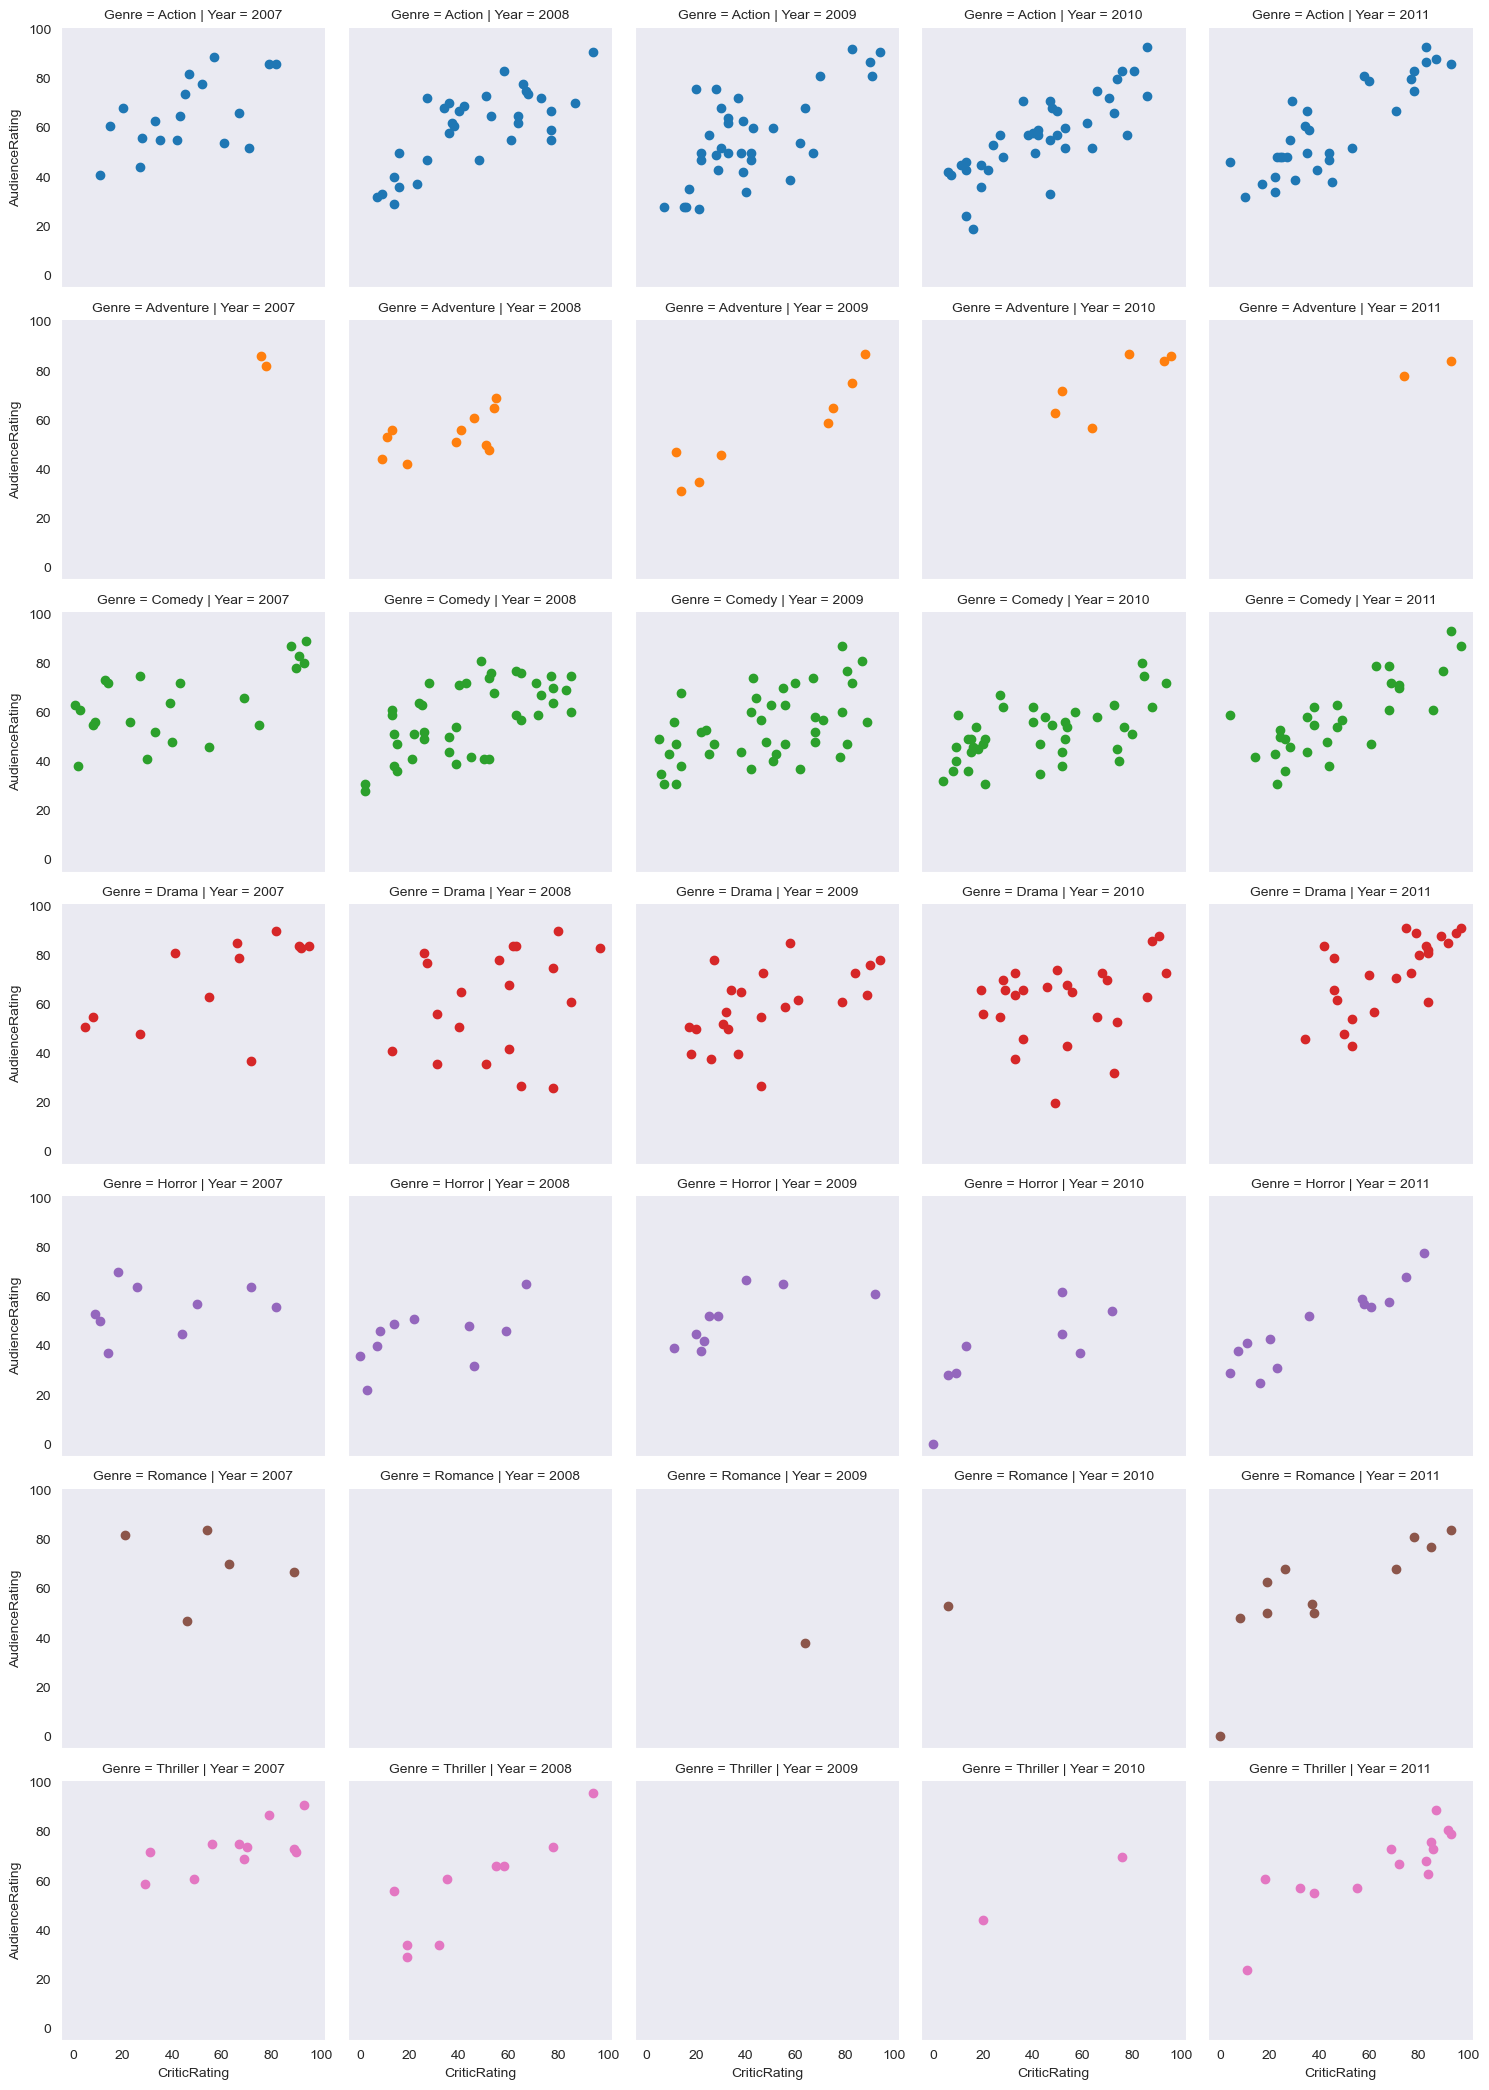

In [86]:
facet1 = sns.FacetGrid(movies, row = 'Genre',
                       col = 'Year', hue = 'Genre')
values = facet1.map(plt.scatter, 'CriticRating', 'AudienceRating')

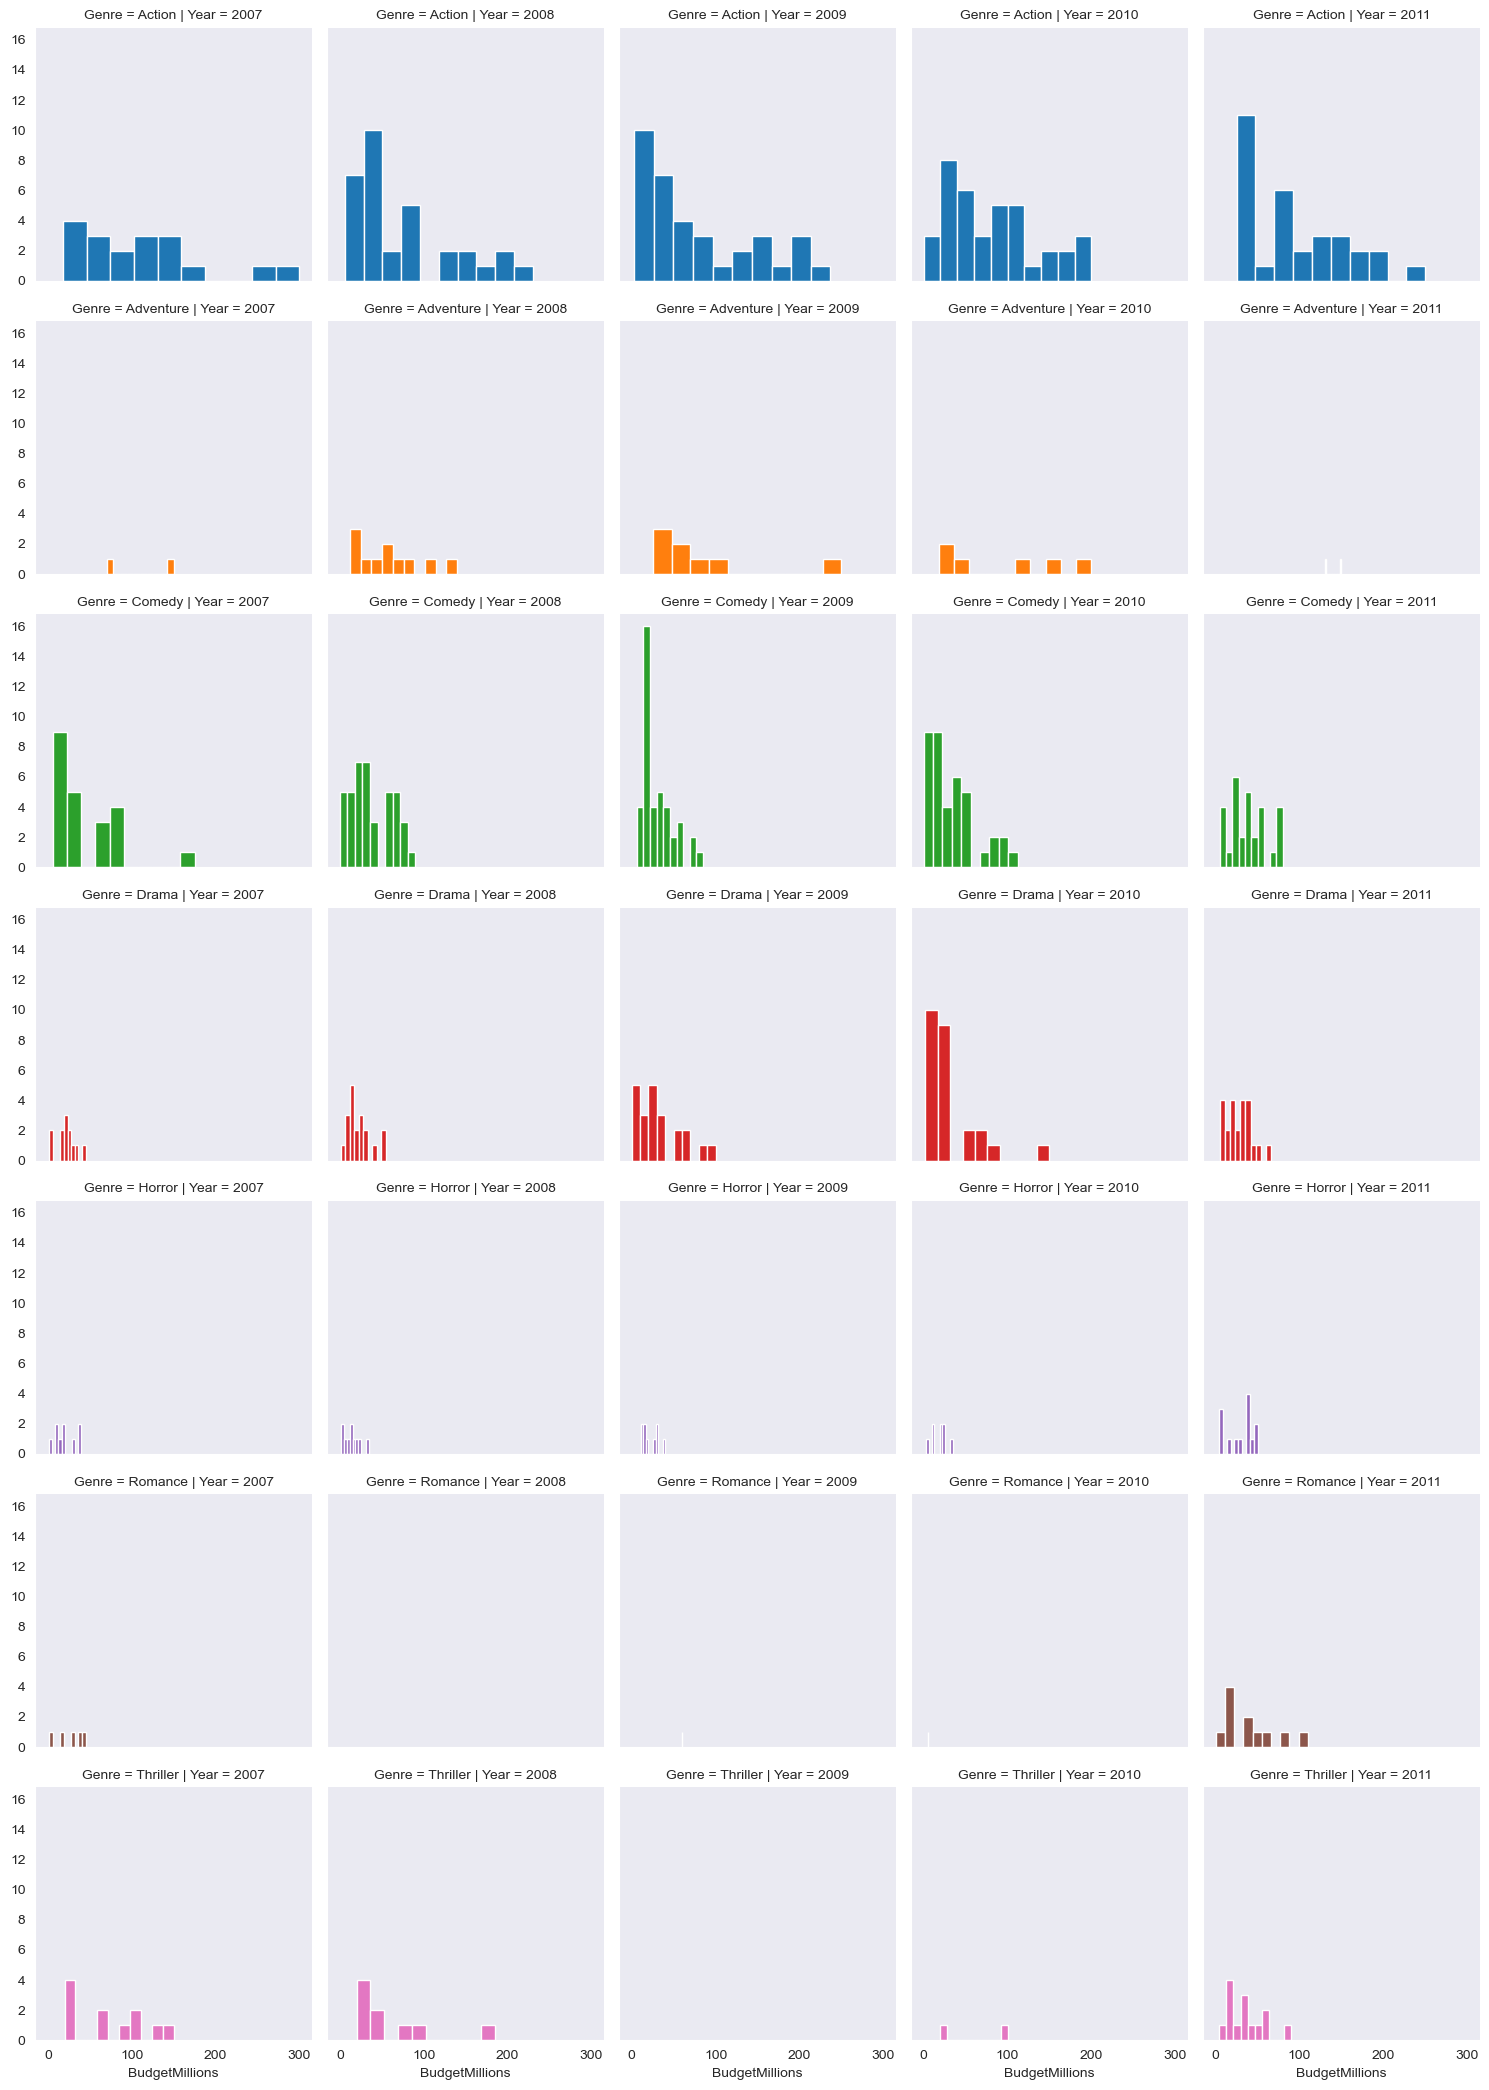

In [88]:
facet2 = sns.FacetGrid(movies, row = 'Genre', 
                      col = 'Year', hue = 'Genre')

values2 = facet2.map(plt.hist, 'BudgetMillions')

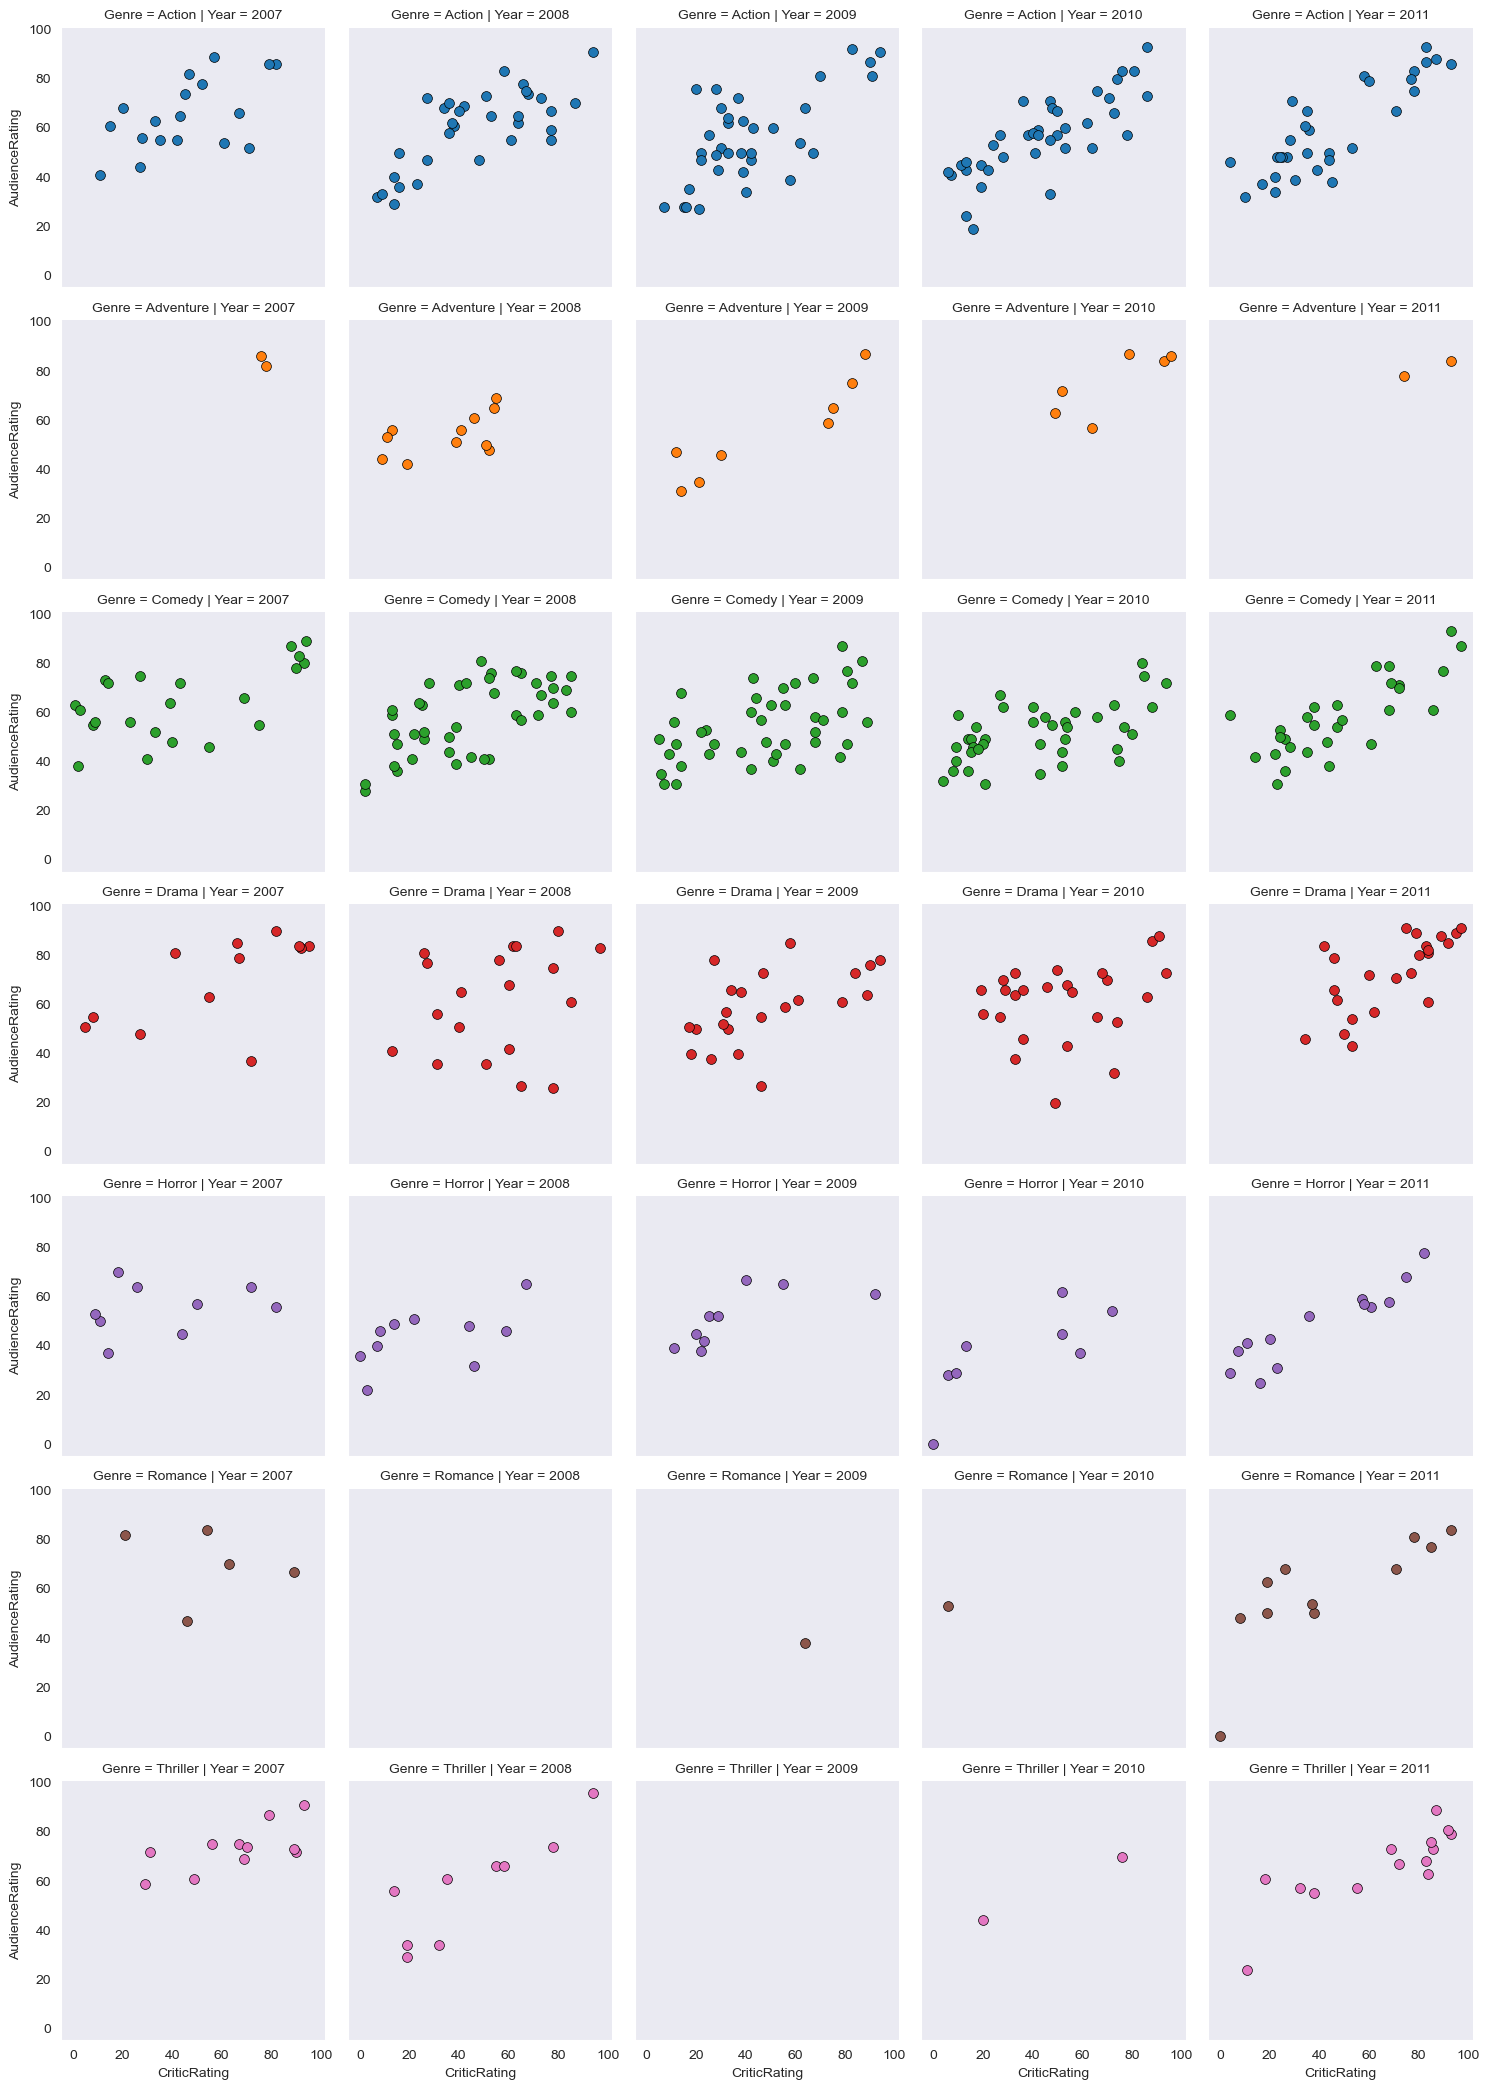

In [89]:
f = sns.FacetGrid(movies, row = 'Genre',
                 col = 'Year', hue = "Genre")

kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
v = f.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
# scatter plot are mapped in facetgrid

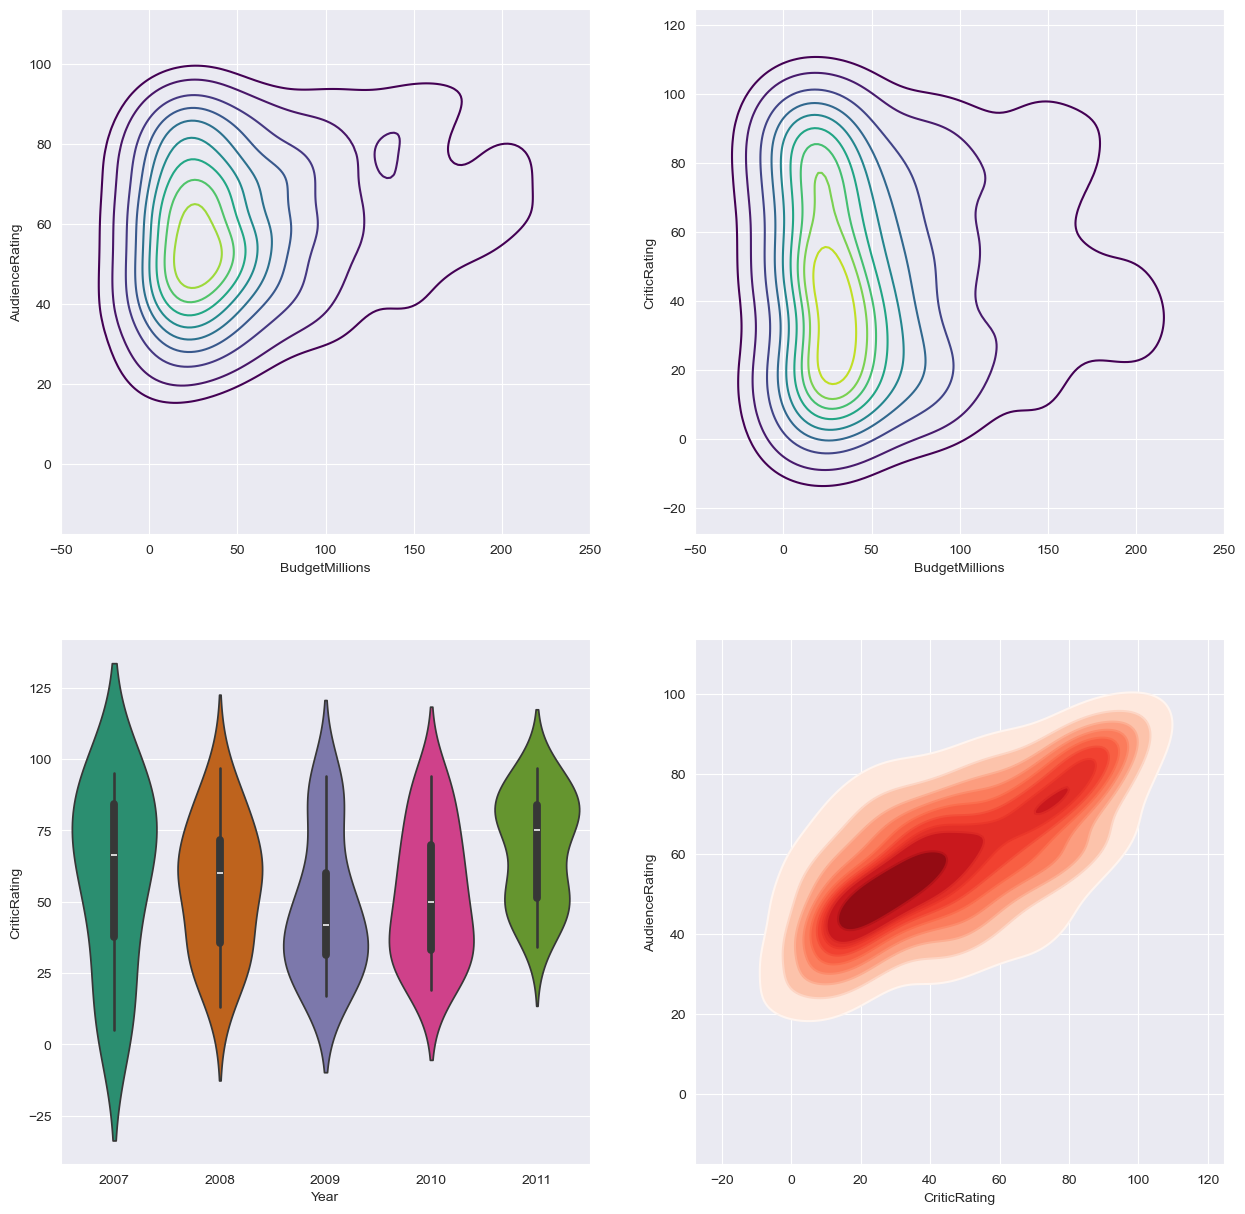

In [116]:
# python is not vectorised programming language
# building dashboard (dashboard - combinatin of charts)

sns.set_style('darkgrid')
f, axes = plt.subplots(2, 2, figsize = (15, 15))

k1 = sns.kdeplot(
    x = movies.BudgetMillions, 
    y = movies.AudienceRating, ax = axes[0,0],
    cmap = 'viridis'
)
k2 = sns.kdeplot(
    x = movies.BudgetMillions,
    y = movies.CriticRating, ax = axes[0,1],
    cmap = 'viridis'
)

k1.set(xlim = (-50, 250))
k2.set(xlim = (-50, 250))

z = sns.violinplot(data = movies[movies.Genre == 'Drama'],
                  x = 'Year', y = 'CriticRating', ax = axes[1,0],
                  palette="Dark2")

k4 = sns.kdeplot(
    x = movies.CriticRating, y = movies.AudienceRating,
    shade = True, shade_lowest =False, cmap = 'Reds', ax = axes[1,1]
)

k4b = sns.kdeplot(
   x= movies.CriticRating, y= movies.AudienceRating,
    cmap = 'Reds', ax = axes[1,1]
)

plt.show()

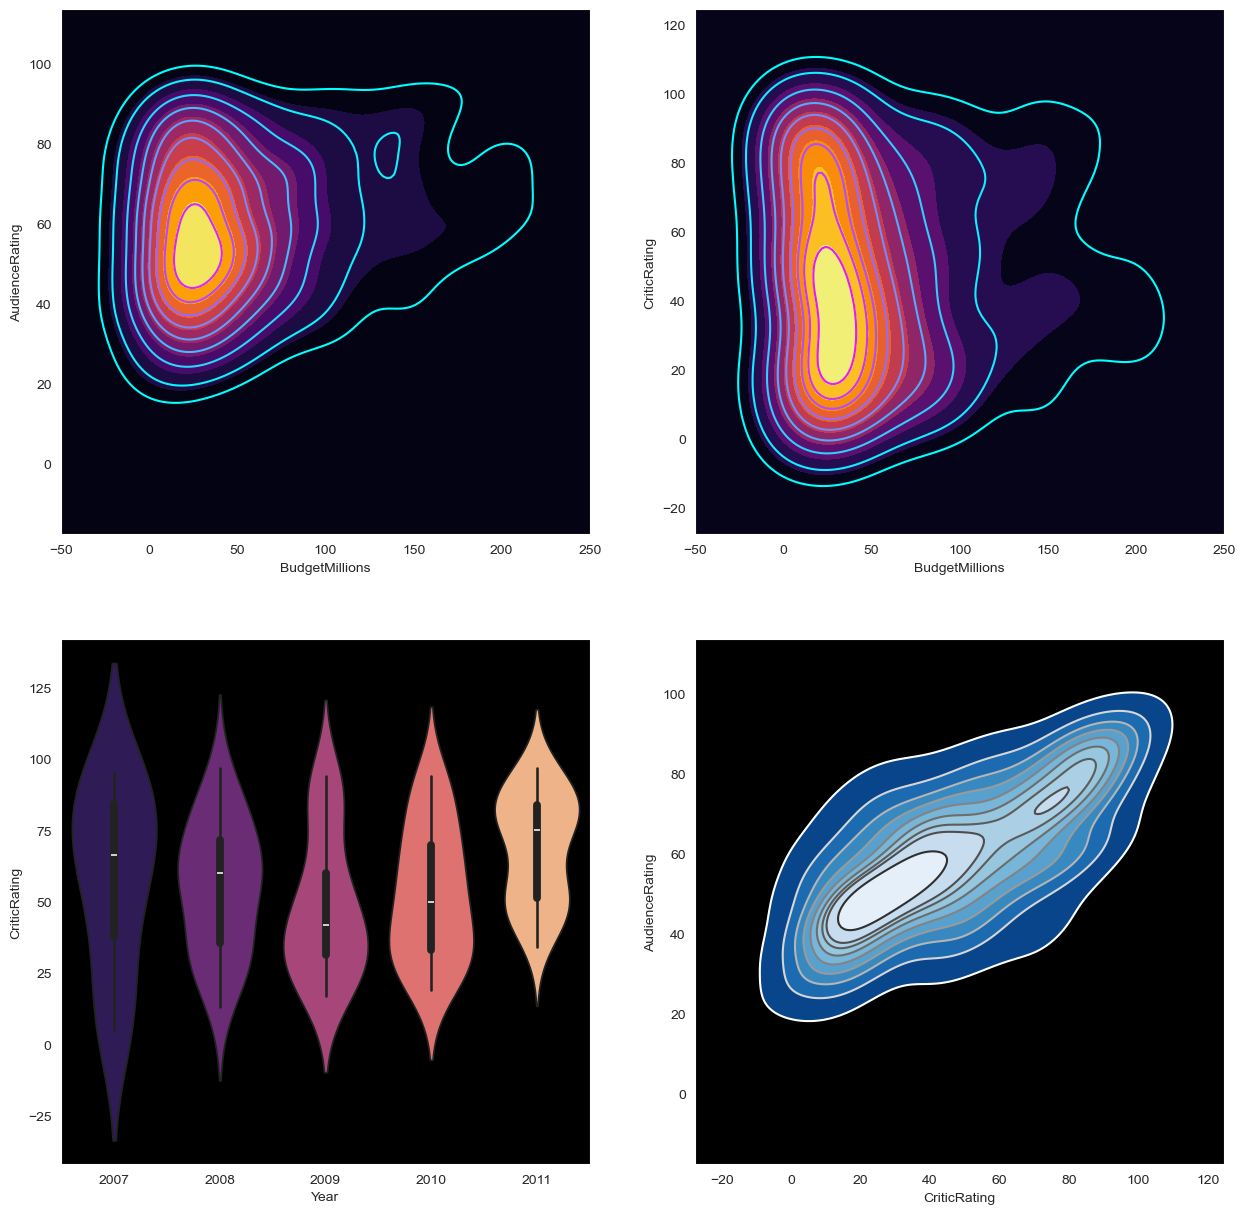

In [120]:
# How can you style your dashboard  using different color map

# python is not vectorize programming language
# Building dashboards (dashboard - combination of chats)

sns.set_style('dark',{'axes.facecolor':'black'})
f, axes = plt.subplots (2,2, figsize = (15,15))

#plot [0,0]
k1 = sns.kdeplot(x=movies.BudgetMillions,y=movies.AudienceRating, \
                 shade = True, shade_lowest=True,cmap = 'inferno', \
                 ax = axes[0,0])
k1b = sns.kdeplot(x=movies.BudgetMillions, y=movies.AudienceRating, \
                 cmap = 'cool',ax = axes[0,0])

#plot [0,1]
k2 = sns.kdeplot(x=movies.BudgetMillions,y=movies.CriticRating,\
                 shade=True, shade_lowest=True, cmap='inferno',\
                 ax = axes[0,1])
k2b = sns.kdeplot(x=movies.BudgetMillions,y=movies.CriticRating,\
                  cmap = 'cool', ax = axes[0,1])

#plot[1,0]
z = sns.violinplot(data=movies[movies.Genre=='Drama'], \
                   x='Year', y = 'CriticRating', ax=axes[1,0], palette = 'magma')

#plot[1,1]
k4 = sns.kdeplot(x=movies.CriticRating,y=movies.AudienceRating, \
                 shade = True,shade_lowest=False,cmap='Blues_r', \
                 ax=axes[1,1])

k4b = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, \
                  cmap='gist_gray_r',ax = axes[1,1])


k1.set(xlim=(-50,250))
k2.set(xlim=(-50,250))

plt.show()